In [237]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
from datetime import datetime

df_path = "Output/01_Exploration_and_Cleanup/v3_clean_data_created_percentage_changes.xlsx"
df = pd.read_excel(df_path)
df.head(10)
#df.shape


,Date,DCOILBRENTEU,DJIA,DCOILWTICO,DHHNGSP,GOLDAMGBD228NLBM,NASDAQCOM,SP500,WILL5000INDFC,DEXCHUS,...,Pct_DCOILWTICO,Pct_DHHNGSP,Pct_GOLDAMGBD228NLBM,Pct_NASDAQCOM,Pct_SP500,Pct_WILL5000INDFC,Pct_DEXCHUS,Pct_DEXINUS,Pct_DEXJPUS,Pct_DEXUSEU
0,2010-04-19,83.09,11092.05,81.52,4.02,1127.50,2480.11,1197.52,47.96,6.8262,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-04-20,84.73,11117.06,82.98,3.93,1142.50,2500.31,1207.17,48.40,6.8253,...,0.017910,-0.022388,0.013304,0.008145,0.008058,0.009174,-0.000132,-0.004919,0.011933,-0.000892
2,2010-04-21,84.55,11124.92,82.78,3.96,1143.75,2504.61,1205.94,48.40,6.8275,...,-0.002410,0.007634,0.001094,0.001720,-0.001019,0.000000,0.000322,0.000899,-0.000429,-0.004685
3,2010-04-22,84.58,11134.29,82.89,3.95,1144.25,2519.07,1208.67,48.60,6.8263,...,0.001329,-0.002525,0.000437,0.005773,0.002264,0.004132,-0.000176,-0.000449,-0.002467,-0.006351
4,2010-04-23,86.09,11204.28,84.34,4.07,1140.00,2530.15,1217.28,48.96,6.8270,...,0.017493,0.030380,-0.003714,0.004398,0.007124,0.007407,0.000103,-0.002246,0.012579,0.004662
5,2010-04-26,86.72,11205.03,84.20,4.23,1154.00,2522.95,1212.05,48.77,6.8266,...,-0.001660,0.039312,0.012281,-0.002846,-0.004296,-0.003881,-0.000059,-0.002026,-0.001274,-0.001796
6,2010-04-27,85.59,10991.99,82.43,4.18,1152.25,2471.47,1183.71,47.62,6.8256,...,-0.021021,-0.011820,-0.001516,-0.020405,-0.023382,-0.023580,-0.000146,0.001805,-0.011163,-0.007948
7,2010-04-28,84.59,11045.27,83.22,4.19,1164.25,2471.73,1191.36,47.88,6.8245,...,0.009584,0.002392,0.010414,0.000105,0.006463,0.005460,-0.000161,0.002927,0.011397,-0.007559
8,2010-04-29,86.82,11167.32,85.17,4.24,1170.00,2511.92,1206.78,48.55,6.8259,...,0.023432,0.011933,0.004939,0.016260,0.012943,0.013993,0.000205,0.001572,0.000957,0.008606
9,2010-04-30,86.19,11008.61,86.07,3.94,1175.25,2461.19,1186.69,47.70,6.8247,...,0.010567,-0.070755,0.004487,-0.020196,-0.016648,-0.017508,-0.000176,-0.009191,0.000850,0.004455


In [238]:
df.shape

(2435, 25)

In [239]:
df.columns

Index(['Date', 'DCOILBRENTEU', 'DJIA', 'DCOILWTICO', 'DHHNGSP',
       'GOLDAMGBD228NLBM', 'NASDAQCOM', 'SP500', 'WILL5000INDFC', 'DEXCHUS',
       'DEXINUS', 'DEXJPUS', 'DEXUSEU', 'Pct_DCOILBRENTEU', 'Pct_DJIA',
       'Pct_DCOILWTICO', 'Pct_DHHNGSP', 'Pct_GOLDAMGBD228NLBM',
       'Pct_NASDAQCOM', 'Pct_SP500', 'Pct_WILL5000INDFC', 'Pct_DEXCHUS',
       'Pct_DEXINUS', 'Pct_DEXJPUS', 'Pct_DEXUSEU'],
      dtype='object')

In [240]:
df.dtypes

Date                     object
DCOILBRENTEU            float64
DJIA                    float64
DCOILWTICO              float64
DHHNGSP                 float64
GOLDAMGBD228NLBM        float64
NASDAQCOM               float64
SP500                   float64
WILL5000INDFC           float64
DEXCHUS                 float64
DEXINUS                 float64
DEXJPUS                 float64
DEXUSEU                 float64
Pct_DCOILBRENTEU        float64
Pct_DJIA                float64
Pct_DCOILWTICO          float64
Pct_DHHNGSP             float64
Pct_GOLDAMGBD228NLBM    float64
Pct_NASDAQCOM           float64
Pct_SP500               float64
Pct_WILL5000INDFC       float64
Pct_DEXCHUS             float64
Pct_DEXINUS             float64
Pct_DEXJPUS             float64
Pct_DEXUSEU             float64
dtype: object

In [241]:
df.describe()

,DCOILBRENTEU,DJIA,DCOILWTICO,DHHNGSP,GOLDAMGBD228NLBM,NASDAQCOM,SP500,WILL5000INDFC,DEXCHUS,DEXINUS,...,Pct_DCOILWTICO,Pct_DHHNGSP,Pct_GOLDAMGBD228NLBM,Pct_NASDAQCOM,Pct_SP500,Pct_WILL5000INDFC,Pct_DEXCHUS,Pct_DEXINUS,Pct_DEXJPUS,Pct_DEXUSEU
count,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,...,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000
mean,78.715511,18030.451306,71.418366,3.223043,1360.113326,4918.416424,2014.199524,90.325515,6.507843,60.803284,...,-0.000164,0.000566,0.000209,0.000565,0.000409,0.000475,0.000015,0.000232,0.000084,-0.000070
std,26.853633,5208.251219,22.562055,0.845200,178.985422,1941.460621,597.919038,30.867602,0.291368,8.545296,...,0.026978,0.043809,0.009896,0.012268,0.011051,0.011242,0.001953,0.005004,0.005903,0.005573
min,14.850000,9686.480000,14.100000,1.490000,1050.600000,2091.790000,1022.580000,41.150000,6.040200,43.900000,...,-0.245260,-0.378495,-0.085271,-0.123212,-0.119841,-0.122405,-0.012340,-0.036863,-0.034372,-0.026370
25%,55.725000,13232.620000,51.485000,2.685000,1232.225000,3064.600000,1418.085000,59.715000,6.236150,54.405000,...,-0.011576,-0.015625,-0.005188,-0.004256,-0.003402,-0.003638,-0.000693,-0.002217,-0.002869,-0.003182
50%,73.450000,17366.240000,68.030000,3.030000,1303.950000,4733.500000,2022.190000,89.390000,6.472300,63.400000,...,0.000445,0.000000,0.000270,0.000920,0.000593,0.000778,0.000000,0.000000,0.000082,-0.000073
75%,107.925000,22180.830000,93.545000,3.830000,1485.975000,6506.340000,2496.050000,115.360000,6.772000,67.070000,...,0.010903,0.015103,0.005440,0.006631,0.005201,0.005428,0.000677,0.002530,0.003205,0.002992
max,128.140000,29551.420000,112.380000,8.150000,1891.000000,9817.180000,3386.150000,160.950000,7.178600,76.400000,...,0.454610,0.691057,0.070258,0.093459,0.093828,0.092660,0.018327,0.047770,0.033993,0.031117


In [242]:
df.count()

Date                    2435
DCOILBRENTEU            2435
DJIA                    2435
DCOILWTICO              2435
DHHNGSP                 2435
GOLDAMGBD228NLBM        2435
NASDAQCOM               2435
SP500                   2435
WILL5000INDFC           2435
DEXCHUS                 2435
DEXINUS                 2435
DEXJPUS                 2435
DEXUSEU                 2435
Pct_DCOILBRENTEU        2434
Pct_DJIA                2434
Pct_DCOILWTICO          2434
Pct_DHHNGSP             2434
Pct_GOLDAMGBD228NLBM    2434
Pct_NASDAQCOM           2434
Pct_SP500               2434
Pct_WILL5000INDFC       2434
Pct_DEXCHUS             2434
Pct_DEXINUS             2434
Pct_DEXJPUS             2434
Pct_DEXUSEU             2434
dtype: int64

In [243]:
#Define the scatter plot
def cccscatter(x_axis,y_axis,a,b,c):
    x_values = x_axis
    y_values = y_axis
    
    
    line_position_x = x_values.min()
    line_position_y = (y_values.max())*0.99
    r_position_x = x_values.min()
    r_position_y = y_values.max()*0.96
    r_squared_position_x = x_values.min()
    r_squared_position_y = y_values.max()*0.93
    
    
    plt.scatter(x_values,y_values)
    plt.title(a)
    plt.xlabel(b)
    plt.ylabel(c)    
    #Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
    # Get regression values
    # y = mx + b
    regress_values = x_values * slope + intercept
    #print(regress_values)
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    
    r_value_eq = "R = " + str(round(rvalue,2))
    r_squared = rvalue * rvalue
    r_squared_value_eq = "R Sqd = " + str(round(r_squared,2))
    
    
    print(line_eq)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(line_position_x,line_position_y),fontsize=12,color="red")
    plt.annotate(r_value_eq, (r_position_x,r_position_y),fontsize=12,color="black")
    plt.annotate(r_squared_value_eq, (r_squared_position_x,r_squared_position_y),fontsize=12,color="brown")
    # Print r square value
    print(f"The r (Correlation) is: {round(rvalue,2)}")
    # Show plot
    plt.savefig("Output/02_Analysis/" + a +".png")
    plt.show()



In [244]:
#==================================================
# FIRST ANALYSIS 
# BRENT CRUDE OIL VS DOW JONES INDUSTRIAL AVERAGE
#==================================================


y = 0.01x +-41.19
The r (Correlation) is: 0.93


C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


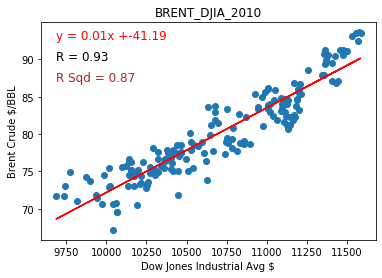

In [245]:
# Limit data frame by what we want to plot
df_01_2010_prep = df[["Date","DCOILBRENTEU","DJIA"]]

# Convert the Date column to the proper format
df_01_2010_prep['Date']=pd.to_datetime(df_01_2010_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2010-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2011-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_01_2010_final = df_01_2010_prep[(df_01_2010_prep['Date']>=date1) & (df_01_2010_prep['Date']<date2)]

# Identify the columns to be plotted
dji_df = df_01_2010_final["DJIA"]
brent_df = df_01_2010_final["DCOILBRENTEU"]

#Define x and y variables
y = brent_df
x = dji_df

# pass the variables to the scatter function
cccscatter(x,y,"BRENT_DJIA_2010","Dow Jones Industrial Avg $","Brent Crude $/BBL")


            

C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = 0.01x +48.22
The r (Correlation) is: 0.37


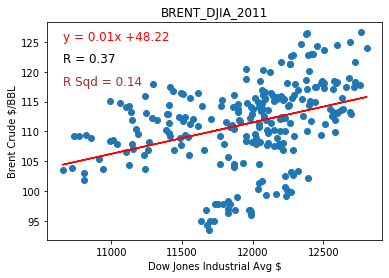

In [246]:
# Limit data frame by what we want to plot
df_01_2011_prep = df[["Date","DCOILBRENTEU","DJIA"]]

# Convert the Date column to the proper format
df_01_2011_prep['Date']=pd.to_datetime(df_01_2011_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2011-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2012-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_01_2011_final = df_01_2011_prep[(df_01_2011_prep['Date']>=date1) & (df_01_2011_prep['Date']<date2)]

# Identify the columns to be plotted
dji_df = df_01_2011_final["DJIA"]
brent_df = df_01_2011_final["DCOILBRENTEU"]

#Define x and y variables
y = brent_df
x = dji_df

# pass the variables to the scatter function
cccscatter(x,y,"BRENT_DJIA_2011","Dow Jones Industrial Avg $","Brent Crude $/BBL")


C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = 0.01x +-20.84
The r (Correlation) is: 0.39


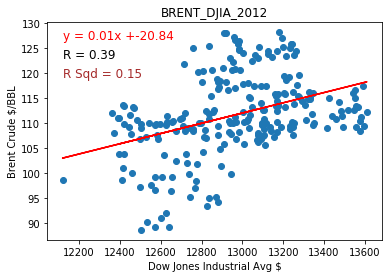

In [247]:
# Limit data frame by what we want to plot
df_01_2012_prep = df[["Date","DCOILBRENTEU","DJIA"]]

# Convert the Date column to the proper format
df_01_2012_prep['Date']=pd.to_datetime(df_01_2012_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2012-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2013-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_01_2012_final = df_01_2012_prep[(df_01_2012_prep['Date']>=date1) & (df_01_2012_prep['Date']<date2)]

# Identify the columns to be plotted
dji_df = df_01_2012_final["DJIA"]
brent_df = df_01_2012_final["DCOILBRENTEU"]

#Define x and y variables
y = brent_df
x = dji_df

# pass the variables to the scatter function
cccscatter(x,y,"BRENT_DJIA_2012","Dow Jones Industrial Avg $","Brent Crude $/BBL")


C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = -0.0x +132.28
The r (Correlation) is: -0.24


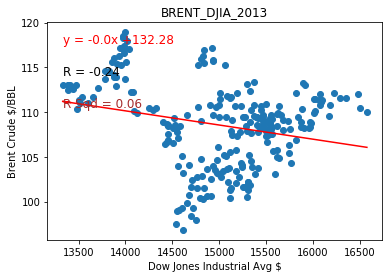

In [248]:

# Limit data frame by what we want to plot
df_01_2013_prep = df[["Date","DCOILBRENTEU","DJIA"]]

# Convert the Date column to the proper format
df_01_2013_prep['Date']=pd.to_datetime(df_01_2013_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2013-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2014-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_01_2013_final = df_01_2013_prep[(df_01_2013_prep['Date']>=date1) & (df_01_2013_prep['Date']<date2)]

# Identify the columns to be plotted
dji_df = df_01_2013_final["DJIA"]
brent_df = df_01_2013_final["DCOILBRENTEU"]

#Define x and y variables
y = brent_df
x = dji_df

# pass the variables to the scatter function
cccscatter(x,y,"BRENT_DJIA_2013","Dow Jones Industrial Avg $","Brent Crude $/BBL")


C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = -0.02x +426.99
The r (Correlation) is: -0.73


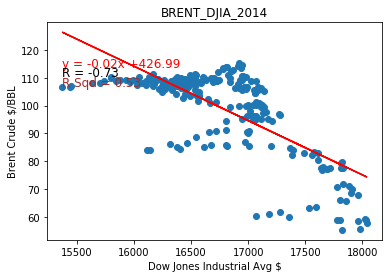

In [249]:

# Limit data frame by what we want to plot
df_01_2014_prep = df[["Date","DCOILBRENTEU","DJIA"]]

# Convert the Date column to the proper format
df_01_2014_prep['Date']=pd.to_datetime(df_01_2014_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2014-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2015-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_01_2014_final = df_01_2014_prep[(df_01_2014_prep['Date']>=date1) & (df_01_2014_prep['Date']<date2)]

# Identify the columns to be plotted
dji_df = df_01_2014_final["DJIA"]
brent_df = df_01_2014_final["DCOILBRENTEU"]

#Define x and y variables
y = brent_df
x = dji_df

# pass the variables to the scatter function
cccscatter(x,y,"BRENT_DJIA_2014","Dow Jones Industrial Avg $","Brent Crude $/BBL")


C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = 0.01x +-85.83
The r (Correlation) is: 0.55


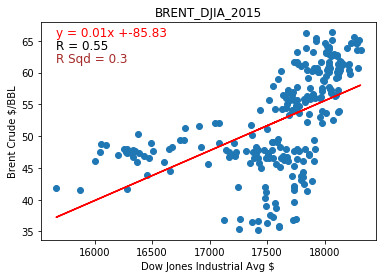

In [250]:

# Limit data frame by what we want to plot
df_01_2015_prep = df[["Date","DCOILBRENTEU","DJIA"]]

# Convert the Date column to the proper format
df_01_2015_prep['Date']=pd.to_datetime(df_01_2015_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2015-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2016-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_01_2015_final = df_01_2015_prep[(df_01_2015_prep['Date']>=date1) & (df_01_2015_prep['Date']<date2)]

# Identify the columns to be plotted
dji_df = df_01_2015_final["DJIA"]
brent_df = df_01_2015_final["DCOILBRENTEU"]

#Define x and y variables
y = brent_df
x = dji_df

# pass the variables to the scatter function
cccscatter(x,y,"BRENT_DJIA_2015","Dow Jones Industrial Avg $","Brent Crude $/BBL")


C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = 0.01x +-63.54
The r (Correlation) is: 0.84


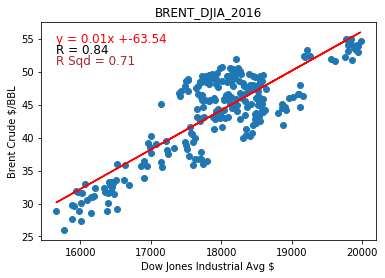

In [251]:

# Limit data frame by what we want to plot
df_01_2016_prep = df[["Date","DCOILBRENTEU","DJIA"]]

# Convert the Date column to the proper format
df_01_2016_prep['Date']=pd.to_datetime(df_01_2016_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2016-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2017-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_01_2016_final = df_01_2016_prep[(df_01_2016_prep['Date']>=date1) & (df_01_2016_prep['Date']<date2)]

# Identify the columns to be plotted
dji_df = df_01_2016_final["DJIA"]
brent_df = df_01_2016_final["DCOILBRENTEU"]

#Define x and y variables
y = brent_df
x = dji_df

# pass the variables to the scatter function
cccscatter(x,y,"BRENT_DJIA_2016","Dow Jones Industrial Avg $","Brent Crude $/BBL")


C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = 0.0x +-7.8
The r (Correlation) is: 0.7


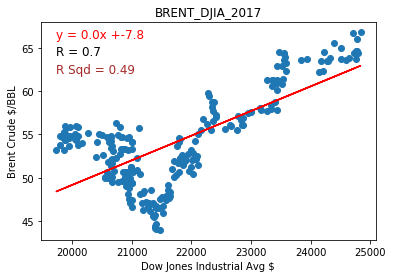

In [252]:

# Limit data frame by what we want to plot
df_01_2017_prep = df[["Date","DCOILBRENTEU","DJIA"]]

# Convert the Date column to the proper format
df_01_2017_prep['Date']=pd.to_datetime(df_01_2017_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2017-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2018-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_01_2017_final = df_01_2017_prep[(df_01_2017_prep['Date']>=date1) & (df_01_2017_prep['Date']<date2)]

# Identify the columns to be plotted
dji_df = df_01_2017_final["DJIA"]
brent_df = df_01_2017_final["DCOILBRENTEU"]

#Define x and y variables
y = brent_df
x = dji_df

# pass the variables to the scatter function
cccscatter(x,y,"BRENT_DJIA_2017","Dow Jones Industrial Avg $","Brent Crude $/BBL")


C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = 0.0x +-26.74
The r (Correlation) is: 0.45


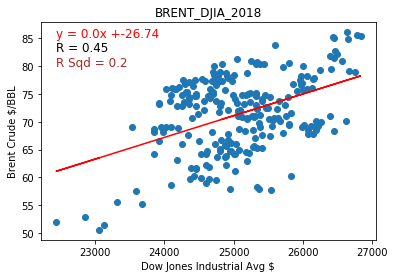

In [253]:

# Limit data frame by what we want to plot
df_01_2018_prep = df[["Date","DCOILBRENTEU","DJIA"]]

# Convert the Date column to the proper format
df_01_2018_prep['Date']=pd.to_datetime(df_01_2018_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2018-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2019-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_01_2018_final = df_01_2018_prep[(df_01_2018_prep['Date']>=date1) & (df_01_2018_prep['Date']<date2)]

# Identify the columns to be plotted
dji_df = df_01_2018_final["DJIA"]
brent_df = df_01_2018_final["DCOILBRENTEU"]

#Define x and y variables
y = brent_df
x = dji_df

# pass the variables to the scatter function
cccscatter(x,y,"BRENT_DJIA_2018","Dow Jones Industrial Avg $","Brent Crude $/BBL")


y = 0.0x +40.63
The r (Correlation) is: 0.22


C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


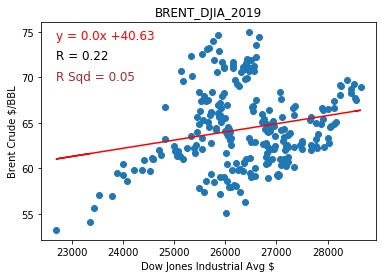

In [254]:

# Limit data frame by what we want to plot
df_01_2019_prep = df[["Date","DCOILBRENTEU","DJIA"]]

# Convert the Date column to the proper format
df_01_2019_prep['Date']=pd.to_datetime(df_01_2019_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2019-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2020-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_01_2019_final = df_01_2019_prep[(df_01_2019_prep['Date']>=date1) & (df_01_2019_prep['Date']<date2)]

# Identify the columns to be plotted
dji_df = df_01_2019_final["DJIA"]
brent_df = df_01_2019_final["DCOILBRENTEU"]

#Define x and y variables
y = brent_df
x = dji_df

# pass the variables to the scatter function
cccscatter(x,y,"BRENT_DJIA_2019","Dow Jones Industrial Avg $","Brent Crude $/BBL")


C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = 0.0x +-73.91
The r (Correlation) is: 0.93


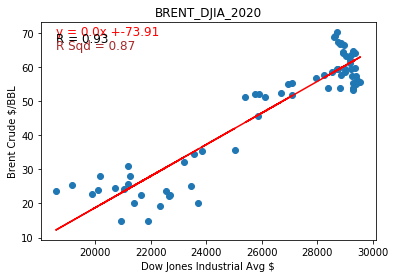

In [255]:
# Limit data frame by what we want to plot
df_01_2020_prep = df[["Date","DCOILBRENTEU","DJIA"]]

# Convert the Date column to the proper format
df_01_2020_prep['Date']=pd.to_datetime(df_01_2020_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2020-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2021-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_01_2020_final = df_01_2020_prep[(df_01_2020_prep['Date']>=date1) & (df_01_2020_prep['Date']<date2)]

# Identify the columns to be plotted
dji_df = df_01_2020_final["DJIA"]
brent_df = df_01_2020_final["DCOILBRENTEU"]

#Define x and y variables
y = brent_df
x = dji_df

# pass the variables to the scatter function
cccscatter(x,y,"BRENT_DJIA_2020","Dow Jones Industrial Avg $","Brent Crude $/BBL")


C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = -0.0x +130.29
The r (Correlation) is: -0.55


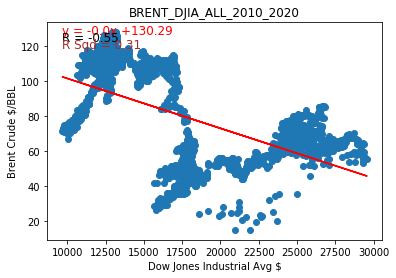

In [256]:
# Limit data frame by what we want to plot
df_01_ALL_prep = df[["Date","DCOILBRENTEU","DJIA"]]

# Convert the Date column to the proper format
df_01_ALL_prep['Date']=pd.to_datetime(df_01_ALL_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2010-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2021-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_01_ALL_final = df_01_ALL_prep[(df_01_ALL_prep['Date']>=date1) & (df_01_ALL_prep['Date']<date2)]

# Identify the columns to be plotted
dji_df = df_01_ALL_final["DJIA"]
brent_df = df_01_ALL_final["DCOILBRENTEU"]

#Define x and y variables
y = brent_df
x = dji_df

# pass the variables to the scatter function
cccscatter(x,y,"BRENT_DJIA_ALL_2010_2020","Dow Jones Industrial Avg $","Brent Crude $/BBL")


In [257]:
#========================================
# MOVING TO THE NEXT ANALYSIS
# GOLD vs DOW JONES INDUSTRIAL AVERAGE
# =======================================

C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = 0.11x +66.03
The r (Correlation) is: 0.69


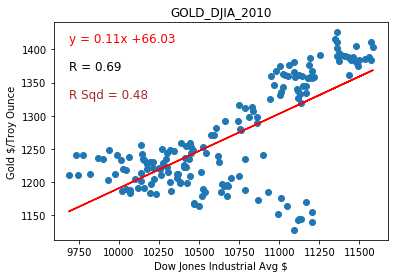

In [258]:
# Limit data frame by what we want to plot
df_02_2010_prep = df[["Date","GOLDAMGBD228NLBM","DJIA"]]

# Convert the Date column to the proper format
df_02_2010_prep['Date']=pd.to_datetime(df_02_2010_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2010-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2011-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_02_2010_final = df_02_2010_prep[(df_02_2010_prep['Date']>=date1) & (df_02_2010_prep['Date']<date2)]

# Identify the columns to be plotted
dji_df = df_02_2010_final["DJIA"]
gold_df = df_02_2010_final["GOLDAMGBD228NLBM"]

#Define x and y variables
y = gold_df
x = dji_df

# pass the variables to the scatter function
cccscatter(x,y,"GOLD_DJIA_2010","Dow Jones Industrial Avg $","Gold $/Troy Ounce")

            

y = -0.16x +3536.1
The r (Correlation) is: -0.54


C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


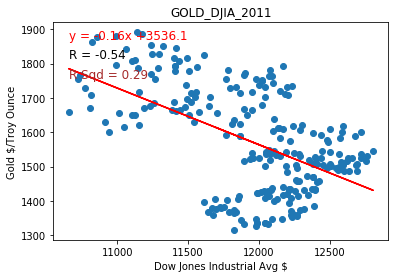

In [259]:
# Limit data frame by what we want to plot
df_02_2011_prep = df[["Date","GOLDAMGBD228NLBM","DJIA"]]

# Convert the Date column to the proper format
df_02_2011_prep['Date']=pd.to_datetime(df_02_2011_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2011-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2012-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_02_2011_final = df_02_2011_prep[(df_02_2011_prep['Date']>=date1) & (df_02_2011_prep['Date']<date2)]

# Identify the columns to be plotted
dji_df = df_02_2011_final["DJIA"]
gold_df = df_02_2011_final["GOLDAMGBD228NLBM"]

#Define x and y variables
y = gold_df
x = dji_df

# pass the variables to the scatter function
cccscatter(x,y,"GOLD_DJIA_2011","Dow Jones Industrial Avg $","Gold $/Troy Ounce")



C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = 0.12x +140.02
The r (Correlation) is: 0.57


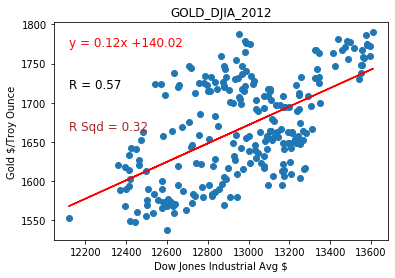

In [260]:
# Limit data frame by what we want to plot
df_02_2012_prep = df[["Date","GOLDAMGBD228NLBM","DJIA"]]

# Convert the Date column to the proper format
df_02_2012_prep['Date']=pd.to_datetime(df_02_2012_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2012-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2013-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_02_2012_final = df_02_2012_prep[(df_02_2012_prep['Date']>=date1) & (df_02_2012_prep['Date']<date2)]

# Identify the columns to be plotted
dji_df = df_02_2012_final["DJIA"]
gold_df = df_02_2012_final["GOLDAMGBD228NLBM"]

#Define x and y variables
y = gold_df
x = dji_df

# pass the variables to the scatter function
cccscatter(x,y,"GOLD_DJIA_2012","Dow Jones Industrial Avg $","Gold $/Troy Ounce")



C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = -0.19x +4196.85
The r (Correlation) is: -0.9


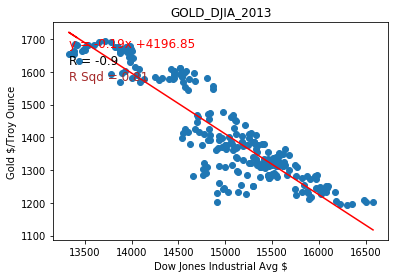

In [261]:
# Limit data frame by what we want to plot
df_02_2013_prep = df[["Date","GOLDAMGBD228NLBM","DJIA"]]

# Convert the Date column to the proper format
df_02_2013_prep['Date']=pd.to_datetime(df_02_2013_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2013-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2014-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_02_2013_final = df_02_2013_prep[(df_02_2013_prep['Date']>=date1) & (df_02_2013_prep['Date']<date2)]

# Identify the columns to be plotted
dji_df = df_02_2013_final["DJIA"]
gold_df = df_02_2013_final["GOLDAMGBD228NLBM"]

#Define x and y variables
y = gold_df
x = dji_df

# pass the variables to the scatter function
cccscatter(x,y,"GOLD_DJIA_2013","Dow Jones Industrial Avg $","Gold $/Troy Ounce")



y = -0.05x +2171.53
The r (Correlation) is: -0.59


C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


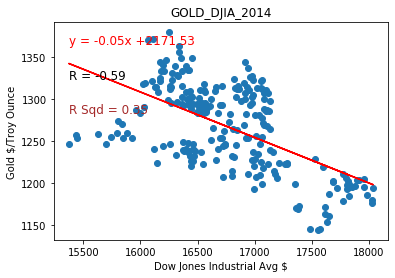

In [262]:
# Limit data frame by what we want to plot
df_02_2014_prep = df[["Date","GOLDAMGBD228NLBM","DJIA"]]

# Convert the Date column to the proper format
df_02_2014_prep['Date']=pd.to_datetime(df_02_2014_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2014-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2015-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_02_2014_final = df_02_2014_prep[(df_02_2014_prep['Date']>=date1) & (df_02_2014_prep['Date']<date2)]

# Identify the columns to be plotted
dji_df = df_02_2014_final["DJIA"]
gold_df = df_02_2014_final["GOLDAMGBD228NLBM"]

#Define x and y variables
y = gold_df
x = dji_df

# pass the variables to the scatter function
cccscatter(x,y,"GOLD_DJIA_2014","Dow Jones Industrial Avg $","Gold $/Troy Ounce")


C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = 0.03x +598.74
The r (Correlation) is: 0.31


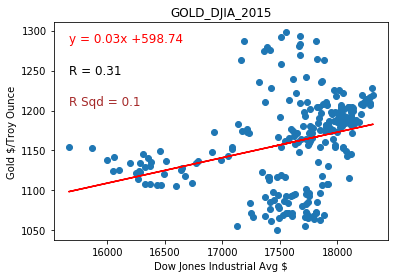

In [263]:
# Limit data frame by what we want to plot
df_02_2015_prep = df[["Date","GOLDAMGBD228NLBM","DJIA"]]

# Convert the Date column to the proper format
df_02_2015_prep['Date']=pd.to_datetime(df_02_2015_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2015-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2016-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_02_2015_final = df_02_2015_prep[(df_02_2015_prep['Date']>=date1) & (df_02_2015_prep['Date']<date2)]

# Identify the columns to be plotted
dji_df = df_02_2015_final["DJIA"]
gold_df = df_02_2015_final["GOLDAMGBD228NLBM"]

#Define x and y variables
y = gold_df
x = dji_df

# pass the variables to the scatter function
cccscatter(x,y,"GOLD_DJIA_2015","Dow Jones Industrial Avg $","Gold $/Troy Ounce")


C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = 0.02x +854.67
The r (Correlation) is: 0.28


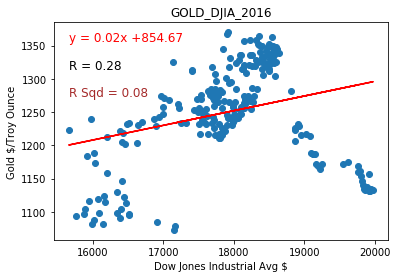

In [264]:
# Limit data frame by what we want to plot
df_02_2016_prep = df[["Date","GOLDAMGBD228NLBM","DJIA"]]

# Convert the Date column to the proper format
df_02_2016_prep['Date']=pd.to_datetime(df_02_2016_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2016-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2017-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_02_2016_final = df_02_2016_prep[(df_02_2016_prep['Date']>=date1) & (df_02_2016_prep['Date']<date2)]

# Identify the columns to be plotted
dji_df = df_02_2016_final["DJIA"]
gold_df = df_02_2016_final["GOLDAMGBD228NLBM"]

#Define x and y variables
y = gold_df
x = dji_df

# pass the variables to the scatter function
cccscatter(x,y,"GOLD_DJIA_2016","Dow Jones Industrial Avg $","Gold $/Troy Ounce")


C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = 0.01x +945.42
The r (Correlation) is: 0.55


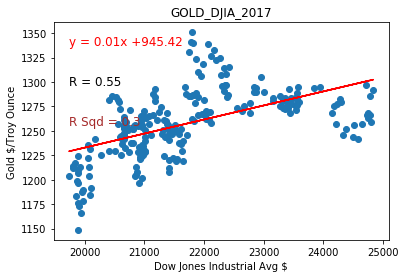

In [265]:
# Limit data frame by what we want to plot
df_02_2017_prep = df[["Date","GOLDAMGBD228NLBM","DJIA"]]

# Convert the Date column to the proper format
df_02_2017_prep['Date']=pd.to_datetime(df_02_2017_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2017-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2018-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_02_2017_final = df_02_2017_prep[(df_02_2017_prep['Date']>=date1) & (df_02_2017_prep['Date']<date2)]

# Identify the columns to be plotted
dji_df = df_02_2017_final["DJIA"]
gold_df = df_02_2017_final["GOLDAMGBD228NLBM"]

#Define x and y variables
y = gold_df
x = dji_df

# pass the variables to the scatter function
cccscatter(x,y,"GOLD_DJIA_2017","Dow Jones Industrial Avg $","Gold $/Troy Ounce")


C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = -0.03x +1945.44
The r (Correlation) is: -0.39


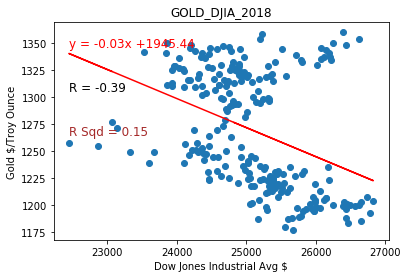

In [266]:
# Limit data frame by what we want to plot
df_02_2018_prep = df[["Date","GOLDAMGBD228NLBM","DJIA"]]

# Convert the Date column to the proper format
df_02_2018_prep['Date']=pd.to_datetime(df_02_2018_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2018-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2019-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_02_2018_final = df_02_2018_prep[(df_02_2018_prep['Date']>=date1) & (df_02_2018_prep['Date']<date2)]

# Identify the columns to be plotted
dji_df = df_02_2018_final["DJIA"]
gold_df = df_02_2018_final["GOLDAMGBD228NLBM"]

#Define x and y variables
y = gold_df
x = dji_df

# pass the variables to the scatter function
cccscatter(x,y,"GOLD_DJIA_2018","Dow Jones Industrial Avg $","Gold $/Troy Ounce")


C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = 0.06x +-76.23
The r (Correlation) is: 0.65


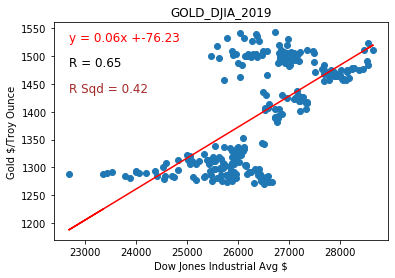

In [267]:
# Limit data frame by what we want to plot
df_02_2019_prep = df[["Date","GOLDAMGBD228NLBM","DJIA"]]

# Convert the Date column to the proper format
df_02_2019_prep['Date']=pd.to_datetime(df_02_2019_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2019-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2020-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_02_2019_final = df_02_2019_prep[(df_02_2019_prep['Date']>=date1) & (df_02_2019_prep['Date']<date2)]

# Identify the columns to be plotted
dji_df = df_02_2019_final["DJIA"]
gold_df = df_02_2019_final["GOLDAMGBD228NLBM"]

#Define x and y variables
y = gold_df
x = dji_df

# pass the variables to the scatter function
cccscatter(x,y,"GOLD_DJIA_2019","Dow Jones Industrial Avg $","Gold $/Troy Ounce")


y = -0.0x +1600.77
The r (Correlation) is: -0.03


C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


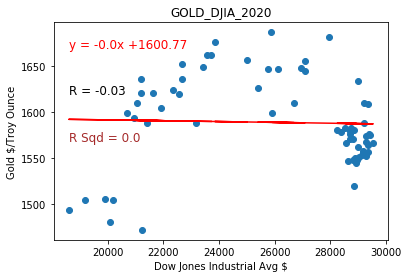

In [268]:
# Limit data frame by what we want to plot
df_02_2020_prep = df[["Date","GOLDAMGBD228NLBM","DJIA"]]

# Convert the Date column to the proper format
df_02_2020_prep['Date']=pd.to_datetime(df_02_2020_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2020-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2021-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_02_2020_final = df_02_2020_prep[(df_02_2020_prep['Date']>=date1) & (df_02_2020_prep['Date']<date2)]

# Identify the columns to be plotted
dji_df = df_02_2020_final["DJIA"]
gold_df = df_02_2020_final["GOLDAMGBD228NLBM"]

#Define x and y variables
y = gold_df
x = dji_df

# pass the variables to the scatter function
cccscatter(x,y,"GOLD_DJIA_2020","Dow Jones Industrial Avg $","Gold $/Troy Ounce")


C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = -0.01x +1528.57
The r (Correlation) is: -0.27


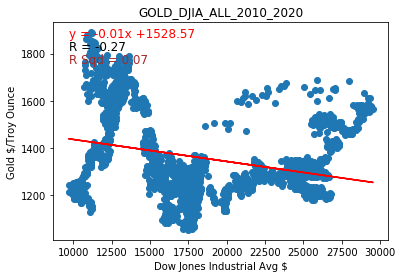

In [269]:
# Limit data frame by what we want to plot
df_02_ALL_prep = df[["Date","GOLDAMGBD228NLBM","DJIA"]]

# Convert the Date column to the proper format
df_02_ALL_prep['Date']=pd.to_datetime(df_02_ALL_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2010-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2021-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_02_ALL_final = df_02_ALL_prep[(df_02_ALL_prep['Date']>=date1) & (df_02_ALL_prep['Date']<date2)]

# Identify the columns to be plotted
dji_df = df_02_ALL_final["DJIA"]
gold_df = df_02_ALL_final["GOLDAMGBD228NLBM"]

#Define x and y variables
y = gold_df
x = dji_df

# pass the variables to the scatter function
cccscatter(x,y,"GOLD_DJIA_ALL_2010_2020","Dow Jones Industrial Avg $","Gold $/Troy Ounce")


In [270]:
#=========================================================================
# MOVING TO THE NEXT ANALYSIS
# CHINESE YUAN / US DOLLAR EXCHANGE RATE vs DOW JONES INDUSTRIAL AVERAGE
# ========================================================================

y = -0.0x +7.91
The r (Correlation) is: -0.74


C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


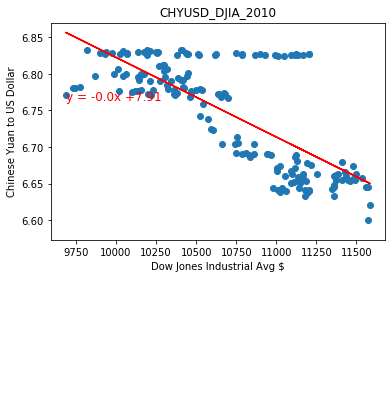

In [271]:
# Limit data frame by what we want to plot
df_03_2010_prep = df[["Date","DEXCHUS","DJIA"]]

# Convert the Date column to the proper format
df_03_2010_prep['Date']=pd.to_datetime(df_03_2010_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2010-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2011-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_03_2010_final = df_03_2010_prep[(df_03_2010_prep['Date']>=date1) & (df_03_2010_prep['Date']<date2)]

# Identify the columns to be plotted
dji_df = df_03_2010_final["DJIA"]
chyusd_df = df_03_2010_final["DEXCHUS"]

#Define x and y variables
y = chyusd_df
x = dji_df

# pass the variables to the scatter function
cccscatter(x,y,"CHYUSD_DJIA_2010","Dow Jones Industrial Avg $","Chinese Yuan to US Dollar")
            

C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = 0.0x +5.6
The r (Correlation) is: 0.41


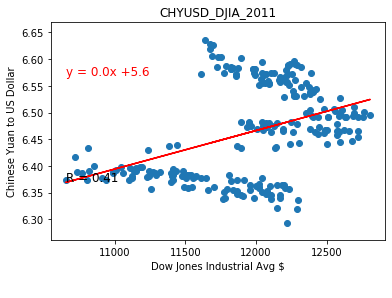

In [272]:
# Limit data frame by what we want to plot
df_03_2011_prep = df[["Date","DEXCHUS","DJIA"]]

# Convert the Date column to the proper format
df_03_2011_prep['Date']=pd.to_datetime(df_03_2011_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2011-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2012-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_03_2011_final = df_03_2011_prep[(df_03_2011_prep['Date']>=date1) & (df_03_2011_prep['Date']<date2)]

# Identify the columns to be plotted
dji_df = df_03_2011_final["DJIA"]
chyusd_df = df_03_2011_final["DEXCHUS"]

#Define x and y variables
y = chyusd_df
x = dji_df

# pass the variables to the scatter function
cccscatter(x,y,"CHYUSD_DJIA_2011","Dow Jones Industrial Avg $","Chinese Yuan to US Dollar")


y = -0.0x +6.87
The r (Correlation) is: -0.3


C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


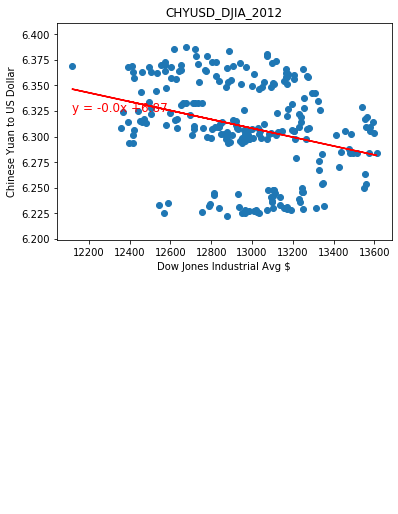

In [273]:
# Limit data frame by what we want to plot
df_03_2012_prep = df[["Date","DEXCHUS","DJIA"]]

# Convert the Date column to the proper format
df_03_2012_prep['Date']=pd.to_datetime(df_03_2012_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2012-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2013-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_03_2012_final = df_03_2012_prep[(df_03_2012_prep['Date']>=date1) & (df_03_2012_prep['Date']<date2)]

# Identify the columns to be plotted
dji_df = df_03_2012_final["DJIA"]
chyusd_df = df_03_2012_final["DEXCHUS"]

#Define x and y variables
y = chyusd_df
x = dji_df

# pass the variables to the scatter function
cccscatter(x,y,"CHYUSD_DJIA_2012","Dow Jones Industrial Avg $","Chinese Yuan to US Dollar")


C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = -0.0x +7.13
The r (Correlation) is: -0.92


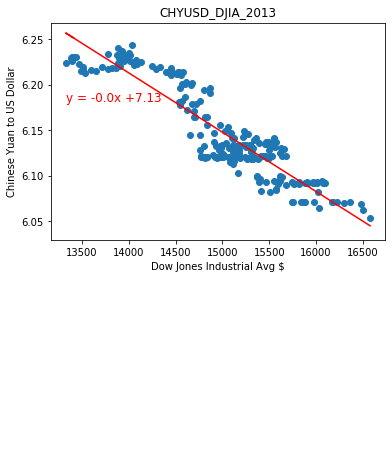

In [274]:
# Limit data frame by what we want to plot
df_03_2013_prep = df[["Date","DEXCHUS","DJIA"]]

# Convert the Date column to the proper format
df_03_2013_prep['Date']=pd.to_datetime(df_03_2013_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2013-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2014-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_03_2013_final = df_03_2013_prep[(df_03_2013_prep['Date']>=date1) & (df_03_2013_prep['Date']<date2)]

# Identify the columns to be plotted
dji_df = df_03_2013_final["DJIA"]
chyusd_df = df_03_2013_final["DEXCHUS"]

#Define x and y variables
y = chyusd_df
x = dji_df

# pass the variables to the scatter function
cccscatter(x,y,"CHYUSD_DJIA_2013","Dow Jones Industrial Avg $","Chinese Yuan to US Dollar")


y = 0.0x +5.75
The r (Correlation) is: 0.23


C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


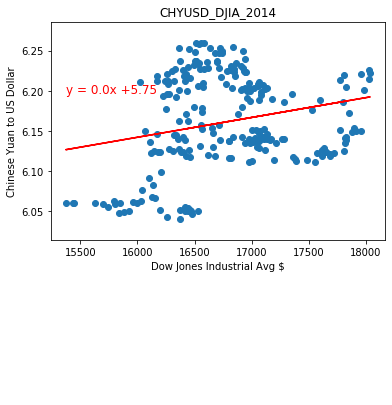

In [275]:
# Limit data frame by what we want to plot
df_03_2014_prep = df[["Date","DEXCHUS","DJIA"]]

# Convert the Date column to the proper format
df_03_2014_prep['Date']=pd.to_datetime(df_03_2014_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2014-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2015-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_03_2014_final = df_03_2014_prep[(df_03_2014_prep['Date']>=date1) & (df_03_2014_prep['Date']<date2)]

# Identify the columns to be plotted
dji_df = df_03_2014_final["DJIA"]
chyusd_df = df_03_2014_final["DEXCHUS"]

#Define x and y variables
y = chyusd_df
x = dji_df

# pass the variables to the scatter function
cccscatter(x,y,"CHYUSD_DJIA_2014","Dow Jones Industrial Avg $","Chinese Yuan to US Dollar")


C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = -0.0x +7.86
The r (Correlation) is: -0.57


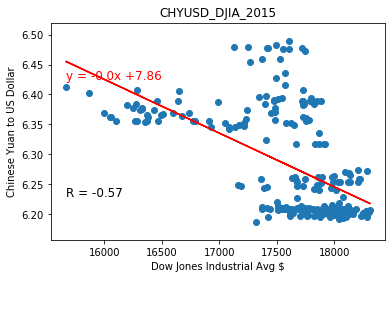

In [276]:
# Limit data frame by what we want to plot
df_03_2015_prep = df[["Date","DEXCHUS","DJIA"]]

# Convert the Date column to the proper format
df_03_2015_prep['Date']=pd.to_datetime(df_03_2015_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2015-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2016-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_03_2015_final = df_03_2015_prep[(df_03_2015_prep['Date']>=date1) & (df_03_2015_prep['Date']<date2)]

# Identify the columns to be plotted
dji_df = df_03_2015_final["DJIA"]
chyusd_df = df_03_2015_final["DEXCHUS"]

#Define x and y variables
y = chyusd_df
x = dji_df

# pass the variables to the scatter function
cccscatter(x,y,"CHYUSD_DJIA_2015","Dow Jones Industrial Avg $","Chinese Yuan to US Dollar")


C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = 0.0x +4.82
The r (Correlation) is: 0.72


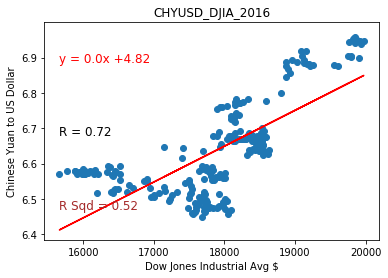

In [277]:
# Limit data frame by what we want to plot
df_03_2016_prep = df[["Date","DEXCHUS","DJIA"]]

# Convert the Date column to the proper format
df_03_2016_prep['Date']=pd.to_datetime(df_03_2016_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2016-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2017-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_03_2016_final = df_03_2016_prep[(df_03_2016_prep['Date']>=date1) & (df_03_2016_prep['Date']<date2)]

# Identify the columns to be plotted
dji_df = df_03_2016_final["DJIA"]
chyusd_df = df_03_2016_final["DEXCHUS"]

#Define x and y variables
y = chyusd_df
x = dji_df

# pass the variables to the scatter function
cccscatter(x,y,"CHYUSD_DJIA_2016","Dow Jones Industrial Avg $","Chinese Yuan to US Dollar")


C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = -0.0x +8.55
The r (Correlation) is: -0.84


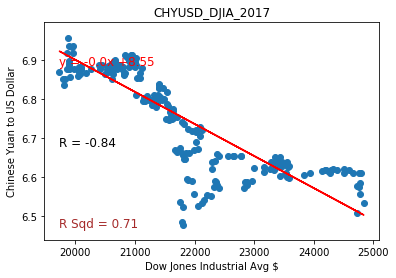

In [278]:
# Limit data frame by what we want to plot
df_03_2017_prep = df[["Date","DEXCHUS","DJIA"]]

# Convert the Date column to the proper format
df_03_2017_prep['Date']=pd.to_datetime(df_03_2017_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2017-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2018-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_03_2017_final = df_03_2017_prep[(df_03_2017_prep['Date']>=date1) & (df_03_2017_prep['Date']<date2)]

# Identify the columns to be plotted
dji_df = df_03_2017_final["DJIA"]
chyusd_df = df_03_2017_final["DEXCHUS"]

#Define x and y variables
y = chyusd_df
x = dji_df

# pass the variables to the scatter function
cccscatter(x,y,"CHYUSD_DJIA_2017","Dow Jones Industrial Avg $","Chinese Yuan to US Dollar")


C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = 0.0x +3.98
The r (Correlation) is: 0.32


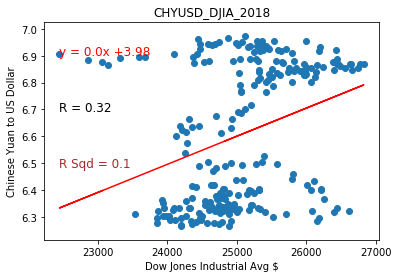

In [279]:
# Limit data frame by what we want to plot
df_03_2018_prep = df[["Date","DEXCHUS","DJIA"]]

# Convert the Date column to the proper format
df_03_2018_prep['Date']=pd.to_datetime(df_03_2018_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2018-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2019-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_03_2018_final = df_03_2018_prep[(df_03_2018_prep['Date']>=date1) & (df_03_2018_prep['Date']<date2)]

# Identify the columns to be plotted
dji_df = df_03_2018_final["DJIA"]
chyusd_df = df_03_2018_final["DEXCHUS"]

#Define x and y variables
y = chyusd_df
x = dji_df

# pass the variables to the scatter function
cccscatter(x,y,"CHYUSD_DJIA_2018","Dow Jones Industrial Avg $","Chinese Yuan to US Dollar")


C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = 0.0x +5.17
The r (Correlation) is: 0.48


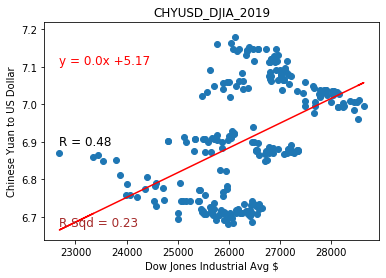

In [280]:
# Limit data frame by what we want to plot
df_03_2019_prep = df[["Date","DEXCHUS","DJIA"]]

# Convert the Date column to the proper format
df_03_2019_prep['Date']=pd.to_datetime(df_03_2019_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2019-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2020-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_03_2019_final = df_03_2019_prep[(df_03_2019_prep['Date']>=date1) & (df_03_2019_prep['Date']<date2)]

# Identify the columns to be plotted
dji_df = df_03_2019_final["DJIA"]
chyusd_df = df_03_2019_final["DEXCHUS"]

#Define x and y variables
y = chyusd_df
x = dji_df

# pass the variables to the scatter function
cccscatter(x,y,"CHYUSD_DJIA_2019","Dow Jones Industrial Avg $","Chinese Yuan to US Dollar")


y = -0.0x +7.37
The r (Correlation) is: -0.75


C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


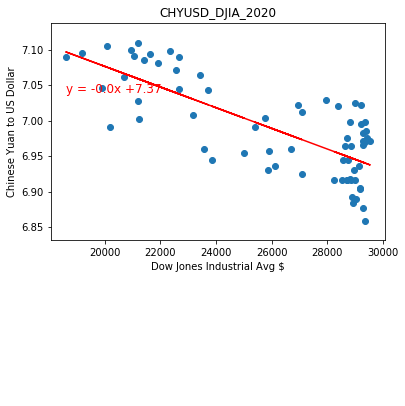

In [281]:
# Limit data frame by what we want to plot
df_03_2020_prep = df[["Date","DEXCHUS","DJIA"]]

# Convert the Date column to the proper format
df_03_2020_prep['Date']=pd.to_datetime(df_03_2020_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2020-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2021-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_03_2020_final = df_03_2020_prep[(df_03_2020_prep['Date']>=date1) & (df_03_2020_prep['Date']<date2)]

# Identify the columns to be plotted
dji_df = df_03_2020_final["DJIA"]
chyusd_df = df_03_2020_final["DEXCHUS"]

#Define x and y variables
y = chyusd_df
x = dji_df

# pass the variables to the scatter function
cccscatter(x,y,"CHYUSD_DJIA_2020","Dow Jones Industrial Avg $","Chinese Yuan to US Dollar")


C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = 0.0x +6.0
The r (Correlation) is: 0.5


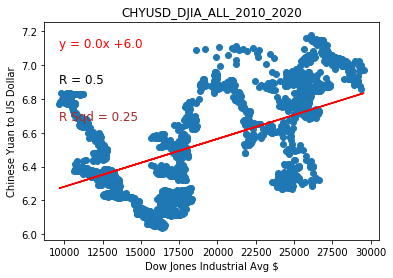

In [282]:
# Limit data frame by what we want to plot
df_03_ALL_prep = df[["Date","DEXCHUS","DJIA"]]

# Convert the Date column to the proper format
df_03_ALL_prep['Date']=pd.to_datetime(df_03_ALL_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2010-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2021-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_03_ALL_final = df_03_ALL_prep[(df_03_ALL_prep['Date']>=date1) & (df_03_ALL_prep['Date']<date2)]

# Identify the columns to be plotted
dji_df = df_03_ALL_final["DJIA"]
chyusd_df = df_03_ALL_final["DEXCHUS"]

#Define x and y variables
y = chyusd_df
x = dji_df

# pass the variables to the scatter function
cccscatter(x,y,"CHYUSD_DJIA_ALL_2010_2020","Dow Jones Industrial Avg $","Chinese Yuan to US Dollar")


In [283]:
#=========================================================================
# MOVING TO THE NEXT ANALYSIS
# INDIAN RUPEE / US DOLLAR EXCHANGE RATE vs DJIA
# ========================================================================

C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = -0.0x +63.32
The r (Correlation) is: -0.83


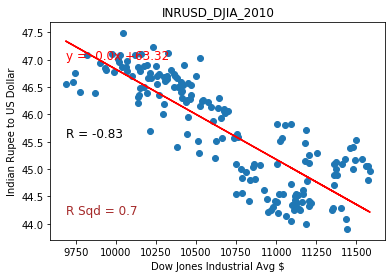

In [284]:
# Limit data frame by what we want to plot
df_04_2010_prep = df[["Date","DEXINUS","DJIA"]]

# Convert the Date column to the proper format
df_04_2010_prep['Date']=pd.to_datetime(df_04_2010_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2010-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2011-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_04_2010_final = df_04_2010_prep[(df_04_2010_prep['Date']>=date1) & (df_04_2010_prep['Date']<date2)]

# Identify the columns to be plotted
djia_df = df_04_2010_final["DJIA"]
inrusd_df = df_04_2010_final["DEXINUS"]

#Define x and y variables
y = inrusd_df
x = djia_df

# pass the variables to the scatter function
cccscatter(x,y,"INRUSD_DJIA_2010","Dow Jones Industrial Avg $","Indian Rupee to US Dollar")
            

y = -0.0x +69.61
The r (Correlation) is: -0.35


C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


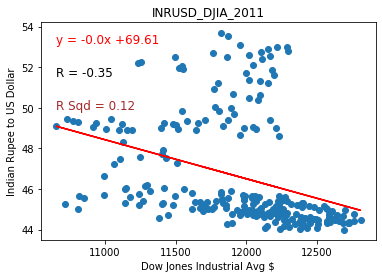

In [285]:
# Limit data frame by what we want to plot
df_04_2011_prep = df[["Date","DEXINUS","DJIA"]]

# Convert the Date column to the proper format
df_04_2011_prep['Date']=pd.to_datetime(df_04_2011_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2011-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2012-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_04_2011_final = df_04_2011_prep[(df_04_2011_prep['Date']>=date1) & (df_04_2011_prep['Date']<date2)]

# Identify the columns to be plotted
djia_df = df_04_2011_final["DJIA"]
inrusd_df = df_04_2011_final["DEXINUS"]

#Define x and y variables
y = inrusd_df
x = djia_df

# pass the variables to the scatter function
cccscatter(x,y,"INRUSD_DJIA_2011","Dow Jones Industrial Avg $","Indian Rupee to US Dollar")
            

C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = -0.0x +59.46
The r (Correlation) is: -0.06


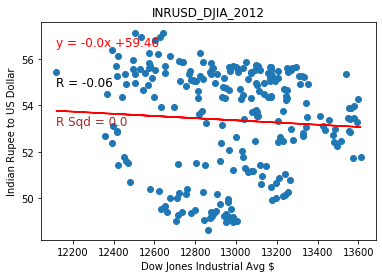

In [286]:
# Limit data frame by what we want to plot
df_04_2012_prep = df[["Date","DEXINUS","DJIA"]]

# Convert the Date column to the proper format
df_04_2012_prep['Date']=pd.to_datetime(df_04_2012_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2012-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2013-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_04_2012_final = df_04_2012_prep[(df_04_2012_prep['Date']>=date1) & (df_04_2012_prep['Date']<date2)]

# Identify the columns to be plotted
djia_df = df_04_2012_final["DJIA"]
inrusd_df = df_04_2012_final["DEXINUS"]

#Define x and y variables
y = inrusd_df
x = djia_df

# pass the variables to the scatter function
cccscatter(x,y,"INRUSD_DJIA_2012","Dow Jones Industrial Avg $","Indian Rupee to US Dollar")
            

C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = 0.0x +2.39
The r (Correlation) is: 0.69


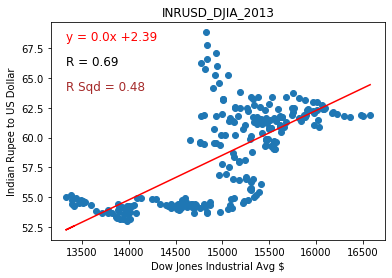

In [287]:
# Limit data frame by what we want to plot
df_04_2013_prep = df[["Date","DEXINUS","DJIA"]]

# Convert the Date column to the proper format
df_04_2013_prep['Date']=pd.to_datetime(df_04_2013_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2013-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2014-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_04_2013_final = df_04_2013_prep[(df_04_2013_prep['Date']>=date1) & (df_04_2013_prep['Date']<date2)]

# Identify the columns to be plotted
djia_df = df_04_2013_final["DJIA"]
inrusd_df = df_04_2013_final["DEXINUS"]

#Define x and y variables
y = inrusd_df
x = djia_df

# pass the variables to the scatter function
cccscatter(x,y,"INRUSD_DJIA_2013","Dow Jones Industrial Avg $","Indian Rupee to US Dollar")
            

y = 0.0x +57.29
The r (Correlation) is: 0.11


C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


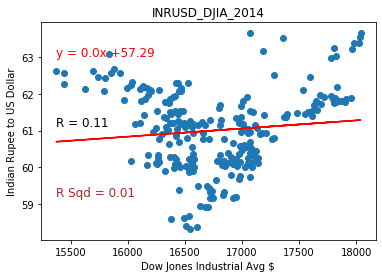

In [288]:
# Limit data frame by what we want to plot
df_04_2014_prep = df[["Date","DEXINUS","DJIA"]]

# Convert the Date column to the proper format
df_04_2014_prep['Date']=pd.to_datetime(df_04_2014_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2014-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2015-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_04_2014_final = df_04_2014_prep[(df_04_2014_prep['Date']>=date1) & (df_04_2014_prep['Date']<date2)]

# Identify the columns to be plotted
djia_df = df_04_2014_final["DJIA"]
inrusd_df = df_04_2014_final["DEXINUS"]

#Define x and y variables
y = inrusd_df
x = djia_df

# pass the variables to the scatter function
cccscatter(x,y,"INRUSD_DJIA_2014","Dow Jones Industrial Avg $","Indian Rupee to US Dollar")

C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = -0.0x +92.73
The r (Correlation) is: -0.56


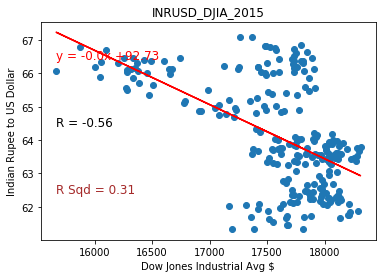

In [289]:
# Limit data frame by what we want to plot
df_04_2015_prep = df[["Date","DEXINUS","DJIA"]]

# Convert the Date column to the proper format
df_04_2015_prep['Date']=pd.to_datetime(df_04_2015_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2015-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2016-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_04_2015_final = df_04_2015_prep[(df_04_2015_prep['Date']>=date1) & (df_04_2015_prep['Date']<date2)]

# Identify the columns to be plotted
djia_df = df_04_2015_final["DJIA"]
inrusd_df = df_04_2015_final["DEXINUS"]

#Define x and y variables
y = inrusd_df
x = djia_df

# pass the variables to the scatter function
cccscatter(x,y,"INRUSD_DJIA_2015","Dow Jones Industrial Avg $","Indian Rupee to US Dollar")


y = -0.0x +68.4
The r (Correlation) is: -0.1


C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


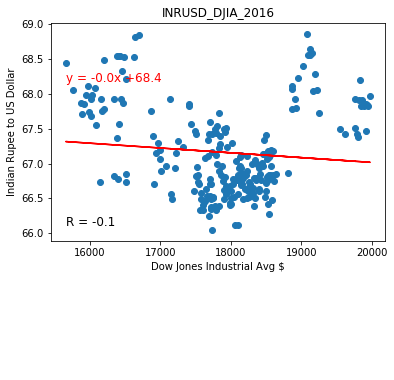

In [290]:
# Limit data frame by what we want to plot
df_04_2016_prep = df[["Date","DEXINUS","DJIA"]]

# Convert the Date column to the proper format
df_04_2016_prep['Date']=pd.to_datetime(df_04_2016_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2016-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2017-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_04_2016_final = df_04_2016_prep[(df_04_2016_prep['Date']>=date1) & (df_04_2016_prep['Date']<date2)]

# Identify the columns to be plotted
djia_df = df_04_2016_final["DJIA"]
inrusd_df = df_04_2016_final["DEXINUS"]

#Define x and y variables
y = inrusd_df
x = djia_df

# pass the variables to the scatter function
cccscatter(x,y,"INRUSD_DJIA_2016","Dow Jones Industrial Avg $","Indian Rupee to US Dollar")



y = -0.0x +75.51
The r (Correlation) is: -0.52


C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


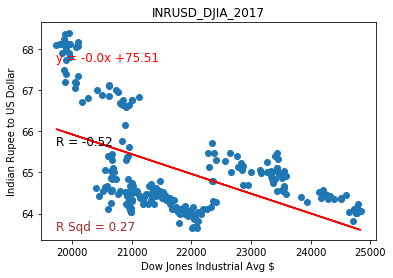

In [291]:
# Limit data frame by what we want to plot
df_04_2017_prep = df[["Date","DEXINUS","DJIA"]]

# Convert the Date column to the proper format
df_04_2017_prep['Date']=pd.to_datetime(df_04_2017_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2017-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2018-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_04_2017_final = df_04_2017_prep[(df_04_2017_prep['Date']>=date1) & (df_04_2017_prep['Date']<date2)]

# Identify the columns to be plotted
djia_df = df_04_2017_final["DJIA"]
inrusd_df = df_04_2017_final["DEXINUS"]

#Define x and y variables
y = inrusd_df
x = djia_df

# pass the variables to the scatter function
cccscatter(x,y,"INRUSD_DJIA_2017","Dow Jones Industrial Avg $","Indian Rupee to US Dollar")



C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = 0.0x +41.01
The r (Correlation) is: 0.27


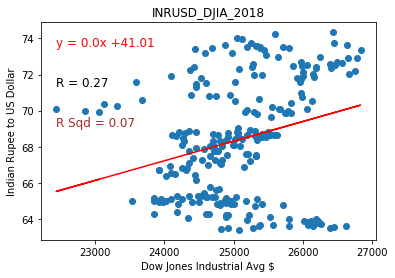

In [292]:
# Limit data frame by what we want to plot
df_04_2018_prep = df[["Date","DEXINUS","DJIA"]]

# Convert the Date column to the proper format
df_04_2018_prep['Date']=pd.to_datetime(df_04_2018_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2018-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2019-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_04_2018_final = df_04_2018_prep[(df_04_2018_prep['Date']>=date1) & (df_04_2018_prep['Date']<date2)]

# Identify the columns to be plotted
djia_df = df_04_2018_final["DJIA"]
inrusd_df = df_04_2018_final["DEXINUS"]

#Define x and y variables
y = inrusd_df
x = djia_df

# pass the variables to the scatter function
cccscatter(x,y,"INRUSD_DJIA_2018","Dow Jones Industrial Avg $","Indian Rupee to US Dollar")



C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = 0.0x +66.36
The r (Correlation) is: 0.16


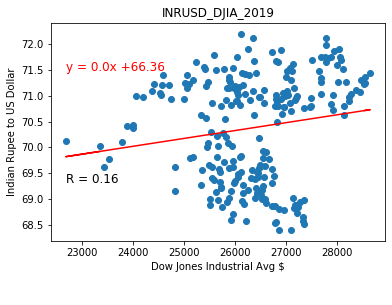

In [293]:
# Limit data frame by what we want to plot
df_04_2019_prep = df[["Date","DEXINUS","DJIA"]]

# Convert the Date column to the proper format
df_04_2019_prep['Date']=pd.to_datetime(df_04_2019_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2019-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2020-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_04_2019_final = df_04_2019_prep[(df_04_2019_prep['Date']>=date1) & (df_04_2019_prep['Date']<date2)]

# Identify the columns to be plotted
djia_df = df_04_2019_final["DJIA"]
inrusd_df = df_04_2019_final["DEXINUS"]

#Define x and y variables
y = inrusd_df
x = djia_df

# pass the variables to the scatter function
cccscatter(x,y,"INRUSD_DJIA_2019","Dow Jones Industrial Avg $","Indian Rupee to US Dollar")



C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = -0.0x +86.24
The r (Correlation) is: -0.92


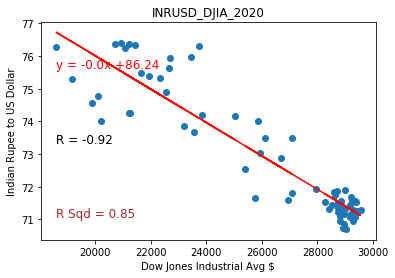

In [294]:
# Limit data frame by what we want to plot
df_04_2020_prep = df[["Date","DEXINUS","DJIA"]]

# Convert the Date column to the proper format
df_04_2020_prep['Date']=pd.to_datetime(df_04_2020_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2020-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2021-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_04_2020_final = df_04_2020_prep[(df_04_2020_prep['Date']>=date1) & (df_04_2020_prep['Date']<date2)]

# Identify the columns to be plotted
djia_df = df_04_2020_final["DJIA"]
inrusd_df = df_04_2020_final["DEXINUS"]

#Define x and y variables
y = inrusd_df
x = djia_df

# pass the variables to the scatter function
cccscatter(x,y,"INRUSD_DJIA_2020","Dow Jones Industrial Avg $","Indian Rupee to US Dollar")



C:\Users\firdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


y = 0.0x +35.44
The r (Correlation) is: 0.86


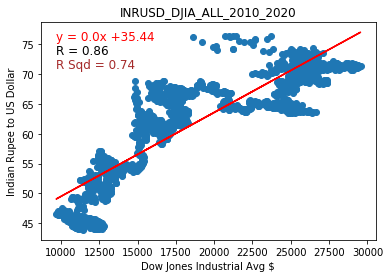

In [295]:
# Limit data frame by what we want to plot
df_04_ALL_prep = df[["Date","DEXINUS","DJIA"]]

# Convert the Date column to the proper format
df_04_ALL_prep['Date']=pd.to_datetime(df_04_ALL_prep['Date'], format='%Y/%m/%d')

# Identify the Date parameters
date1 = datetime.strptime('2010-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2021-01-01', '%Y-%m-%d')

# Create the dataframe for the relevant time period
df_04_ALL_final = df_04_ALL_prep[(df_04_ALL_prep['Date']>=date1) & (df_04_ALL_prep['Date']<date2)]

# Identify the columns to be plotted
djia_df = df_04_ALL_final["DJIA"]
inrusd_df = df_04_ALL_final["DEXINUS"]

#Define x and y variables
y = inrusd_df
x = djia_df

# pass the variables to the scatter function
cccscatter(x,y,"INRUSD_DJIA_ALL_2010_2020","Dow Jones Industrial Avg $","Indian Rupee to US Dollar")

